In [ ]:
import numpy as np

#1. Модифицировать (предложить собственные) два метода генерации псевдослучайных чисел.

**Аддитивный метод (генератор Фибоначчи)**


Определяется целое число m. Берутся два целых числа. Следующее число равно сумме двух предыдущих, взятой по модулю m.

In [ ]:
def fibb(prev_1, prev_2, m):
  return (prev_1 + prev_2) % m

**BBS – генератор**

Вначале выбираются два больших простых числа p и q: p mod 4 = q mod 4 = 3, m=p*q. Стартовое число генератора должно быть взаимно просто с m.

In [ ]:
def BBS(prev_1, m):
  return (np.power(prev_1,2)) % m

#2. Получить не менее 20 выборок каждым методом (диапазон чисел в каждой выборке не менее 5000) объемом не менее 100 элементов каждая.

In [ ]:
m=101297

In [ ]:
samples_1=np.array([])
mas=np.array([101296,1012975])
for i in range (2,2000):
  mas=np.append(mas,fibb(mas[i-2],mas[i-1],m))
samples_1=np.reshape(mas, (20, 100))

In [ ]:
samples_2=np.array([])
mas=np.array([31])
for i in range (1,2000):
  mas=np.append(mas,BBS(mas[i-1],m))
samples_2=np.reshape(mas, (20, 100))

#3. Для каждой выборки посчитать среднее, отклонение и коэффициент вариации.

In [ ]:
import pandas as pd

In [ ]:
mean_1,mean_2,std_1,std_2,cvar_1,cvar_2=[],[],[],[],[],[]
for i in range (20):
  # среднее
  mean_1.append(samples_1[i].mean())
  mean_2.append(samples_2[i].mean())
  # отклонение
  std_1.append(samples_1[i].std())
  std_2.append(samples_2[i].std())
  # коэффициент вариации
  cvar_1.append(std_1[i]/mean_1[i])
  cvar_2.append(std_2[i]/mean_2[i])

Занесем все полученные данные в таблицы

Для первого метода:

In [ ]:
parametrs_1_dict={"среднее":mean_1,"отклонение":std_1,"коэффициент_вариации":cvar_1}
parametrs_1 = pd.DataFrame(parametrs_1_dict)
parametrs_1.head()

,среднее,отклонение,коэффициент_вариации
0,53116.73,102292.378459,1.925803
1,50957.77,27954.696136,0.548586
2,55026.69,28702.569090,0.521612
3,54944.32,27806.885342,0.506092
4,52031.31,29728.223065,0.571353


Для второго метода:

In [ ]:
parametrs_2_dict={"среднее":mean_2,"отклонение":std_2,"коэффициент_вариации":cvar_2}
parametrs_2 = pd.DataFrame(parametrs_2_dict)
parametrs_2.head()

,среднее,отклонение,коэффициент_вариации
0,50200.83,31635.675942,0.630182
1,50294.36,28360.990199,0.563900
2,51563.60,30391.024903,0.589389
3,50059.16,29518.884683,0.589680
4,51723.48,28630.978164,0.553539


#4. Каждую выборку проверить на равномерность распределения и случайность, используя критерий Хи-квадрат.

In [ ]:
import math

Разобьем диапазон возможных значений [0, 101297] на k интервалов по формуле Стерджеса:

In [ ]:
N=100
k=round(1+1.44*math.log(N)) # k = 8
intervals_borders=[ (m//k)*i for i in range (1,k) ]
intervals_borders.append(m)
intervals_borders

[12662, 25324, 37986, 50648, 63310, 75972, 88634, 101297]

Определяется количество случайных чисел, попавших в каждый
интервал:

In [ ]:
n_i_1,n_i_2=[[]]*20,[[]]*20
for i in range (20):
  n_i_1[i],n_i_2[i]=[0]*k,[0]*k
  for j in range (100):
    for g in range (k):
      if samples_1[i][j]<=intervals_borders[g]:
        n_i_1[i][g]+=1
        break
    for g in range (k):
      if samples_2[i][j]<=intervals_borders[g]:
        n_i_2[i][g]+=1
        break

Вычисляем экспериментальное значение хи-квадрат

In [ ]:
hi_exp_1,hi_exp_2=[],[]

for i in range (20):
  s1,s2=0,0
  for j in range (k):
    s1+=n_i_1[i][j]**2
    s2+=n_i_2[i][j]**2
  hi_exp_1.append(k*s1/N-N)
  hi_exp_2.append(k*s2/N-N)

Сравниваем экспериментально полученное значение хи-квадрат с экспериментальным

In [ ]:
probabilities = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]
hi_teor = [1.239, 2.167, 4.255, 6.346, 9.037, 14.07, 18.48]

Для первого метода:

In [ ]:
i=1
for elem in (hi_exp_1):
  if (elem < hi_teor[0]) or (elem > hi_teor[-1]):
    print(f"Для выборки №{i}{' ' if i < 10 else ''} гипотеза о случайности и равномерности ГПСЧ не выполняется")
  else:
    print(f"Для выборки №{i}{' ' if i < 10 else ''} p = {probabilities[min(range(len(hi_teor)), key = lambda j: abs(hi_teor[j]-elem))]}")
  i+=1

Для выборки №1  гипотеза о случайности и равномерности ГПСЧ не выполняется
Для выборки №2  p = 0.25
Для выборки №3  p = 0.75
Для выборки №4  p = 0.75
Для выборки №5  p = 0.05
Для выборки №6  p = 0.5
Для выборки №7  p = 0.25
Для выборки №8  p = 0.25
Для выборки №9  p = 0.25
Для выборки №10 p = 0.05
Для выборки №11 p = 0.25
Для выборки №12 p = 0.5
Для выборки №13 p = 0.05
Для выборки №14 p = 0.75
Для выборки №15 p = 0.5
Для выборки №16 p = 0.95
Для выборки №17 p = 0.05
Для выборки №18 p = 0.95
Для выборки №19 p = 0.25
Для выборки №20 p = 0.5


Для второго метода:

In [ ]:
i=1
for elem in (hi_exp_2):
  if (elem < hi_teor[0]) or (elem > hi_teor[-1]):
    print(f"Для выборки №{i}{' ' if i < 10 else ''} гипотеза о случайности и равномерности ГПСЧ не выполняется")
  else:
    print(f"Для выборки №{i}{' ' if i < 10 else ''} p = {probabilities[min(range(len(hi_teor)), key = lambda j: abs(hi_teor[j]-elem))]}")
  i+=1

Для выборки №1  p = 0.75
Для выборки №2  p = 0.25
Для выборки №3  p = 0.75
Для выборки №4  гипотеза о случайности и равномерности ГПСЧ не выполняется
Для выборки №5  p = 0.5
Для выборки №6  p = 0.5
Для выборки №7  p = 0.25
Для выборки №8  p = 0.5
Для выборки №9  p = 0.05
Для выборки №10 p = 0.5
Для выборки №11 p = 0.5
Для выборки №12 p = 0.25
Для выборки №13 p = 0.25
Для выборки №14 p = 0.05
Для выборки №15 p = 0.75
Для выборки №16 p = 0.25
Для выборки №17 p = 0.5
Для выборки №18 p = 0.5
Для выборки №19 p = 0.05
Для выборки №20 p = 0.5


#5. Для каждого алгоритма осуществить проверку с помощью не менее 3-х тестов NIST и/или Diehard. Сделать выводы и сравнить их с п.4.

Генерация двоичных выборок

In [ ]:
size=100000

In [ ]:
mas=[101296,1012975]
for i in range (2,size):
  mas.append(fibb(mas[i-2],mas[i-1],m))
samples_1_bin=np.array([i%2 for i in mas])

In [ ]:
mas=[31]
for i in range (1,size):
  mas.append(BBS(mas[i-1],m))
samples_2_bin=np.array([i%2 for i in mas])

**Частотный побитовый тест**

In [ ]:
s_1=abs(np.count_nonzero (samples_1_bin == 1 ) - np.count_nonzero (samples_1_bin == 0 ))
s_2=abs(np.count_nonzero (samples_2_bin == 1 ) - np.count_nonzero (samples_2_bin == 0 ))
s_obs_1=s_1/(math.sqrt(size))
s_obs_2=s_2/(math.sqrt(size))
p_value_1=math.erfc(s_obs_1 / math.sqrt(2))
p_value_2=math.erfc(s_obs_2 / math.sqrt(2))
print("последовательность 1 носит случайный характер") if (p_value_1 >= 0.01) else print("последовательность 1 не является истинно случайной")
print("последовательность 2 носит случайный характер") if (p_value_2 >= 0.01) else print("последовательность 2 не является истинно случайной")

последовательность 1 носит случайный характер
последовательность 2 носит случайный характер


**Частотный блочный тест**

In [ ]:
import scipy.special

In [ ]:
M=5
N = size // M
pi_1 = np.array([np.sum(samples_1_bin[i*M:(i+1)*M] == 1) / M for i in range(N)])
pi_2 = np.array([np.sum(samples_2_bin[i*M:(i+1)*M] == 1) / M for i in range(N)])
hi_obs_1 = 4*M*np.sum((pi_1 - 0.5)**2)
hi_obs_2 = 4*M*np.sum((pi_2 - 0.5)**2)
p_value_1 = scipy.special.gammaincc(N / 2, hi_obs_1 / 2)
p_value_2 = scipy.special.gammaincc(N / 2, hi_obs_2 / 2)
print("последовательность 1 носит случайный характер") if (p_value_1 >= 0.01) else print("последовательность 1 не является истинно случайной")
print("последовательность 2 носит случайный характер") if (p_value_2 >= 0.01) else print("последовательность 2 не является истинно случайной")

последовательность 1 носит случайный характер
последовательность 2 носит случайный характер


**Тест на последовательность одинаковых битов**

In [ ]:
t = 2 / (size**0.5)
tmp=1
for sample in [samples_1_bin,samples_2_bin]:
  pi=np.sum(sample == 1)/ size
  if abs(pi - 0.5) >= t:
    print(f"последовательность {tmp} не является истинно случайной")
  else:
    V_n_obs= 1
    for i in range(size-1):
        if sample[i] != sample[i+1]: V_n_obs += 1
    p_value = math.erfc( abs(V_n_obs - 2*size*pi*(1-pi)) / (2*(2*size)**0.5*pi*(1-pi)))
    print(f"последовательность {tmp} носит случайный характер") if (p_value >= 0.01) else print(f"последовательность {tmp} не является истинно случайной")
  tmp=2

последовательность 1 носит случайный характер
последовательность 2 не является истинно случайной


##Выводы

Для первого метода все тесты были пройдены, для второго 2/3, что является отличным результатом для таких простых алгоритмов. С п.4 разногласий нет.

#6. Засечь время генерации чисел от тысячи до миллиона элементов обоими предложенными методами и любым стандартным методом используемого языка программирования.

In [ ]:
import time
import random

In [ ]:
samples_sizes = [1000, 10000, 100000, 500000, 1000000]
times1 = []
times2 = []
times3 = []
for s_size in samples_sizes:
  start_time1 = time.perf_counter()
  mas=[101296,1012975]
  for i in range (2,s_size):
    mas.append(fibb(mas[i-2],mas[i-1],m))
  times1.append(time.perf_counter() - start_time1)

  start_time2 = time.perf_counter()
  mas=[31]
  for i in range (1,s_size):
    mas.append(BBS(mas[i-1],m))
  times2.append(time.perf_counter() - start_time2)

  start_time3 = time.perf_counter()
  for i in range(s_size):
    random.randint(0, m)
  times3.append(time.perf_counter() - start_time3)

#Построить графики сравнения скоростей в зависимости от объема выборки.

In [ ]:
import matplotlib.pyplot as plt

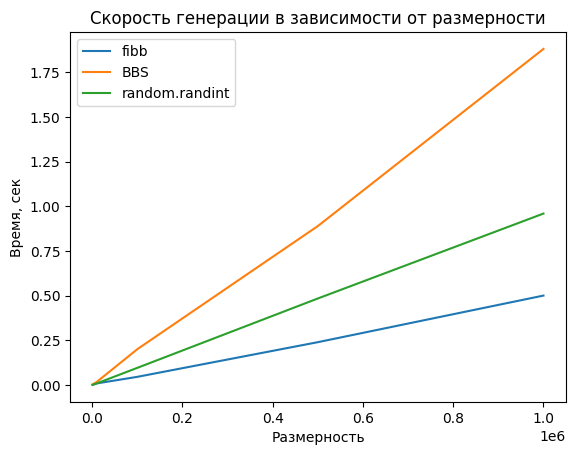

In [ ]:
plt.title('Скорость генерации в зависимости от размерности')
plt.xlabel('Размерность')
plt.ylabel('Время, сек')
plt.plot(samples_sizes, times1)
plt.plot(samples_sizes, times2)
plt.plot(samples_sizes, times3)
plt.legend(['fibb', 'BBS', 'random.randint'])
plt.show()